In [1]:
import numpy as np

In [3]:
!pip install mtcnn

In [4]:
# Multi-task Cascaded Convolutional Networks (MTCNN)
import cv2
from mtcnn.mtcnn import MTCNN

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [7]:
img = cv2.imread("/content/drive/My Drive/IMG_20200801_145051.jpg")

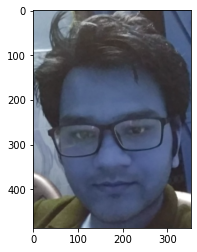

In [8]:
plt.imshow(img)

In [9]:
detector = MTCNN()
#image = cv2.imread("ivan.jpg")
result = detector.detect_faces(img)

In [ ]:
result

[{'box': [50, 153, 255, 305],
  'confidence': 0.9993129968643188,
  'keypoints': {'left_eye': (114, 275),
   'mouth_left': (132, 393),
   'mouth_right': (234, 387),
   'nose': (169, 342),
   'right_eye': (232, 267)}}]

In [11]:
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

In [ ]:
keypoints

{'left_eye': (114, 275),
 'mouth_left': (132, 393),
 'mouth_right': (234, 387),
 'nose': (169, 342),
 'right_eye': (232, 267)}

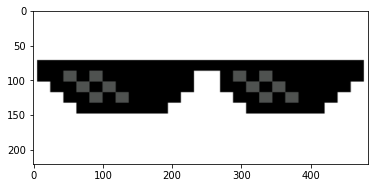

In [10]:
glass = cv2.imread("/content/drive/My Drive/glasses.png" , -1)
plt.imshow(glass)

In [ ]:
glasses_width = keypoints['right_eye'][0] - keypoints['left_eye'][0]
glasses_width

118

In [ ]:
glass = cv2.resize(glass, (glasses_width*2,250))

In [ ]:
gw,gh,gc = glass.shape

In [ ]:
glass.shape

(250, 236, 4)

In [ ]:
img_copy = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)   

In [ ]:
img_copy.shape

(487, 353, 4)

In [ ]:
gw,gh

(250, 236)

In [ ]:
for i in range(0,gw):       # Overlay the filter based on the alpha channel
  for j in range(0,gh):
    if glass[i,j][3] != 0:
      img_copy[i+keypoints['left_eye'][1]-100,j+int(keypoints['left_eye'][0]/2)] = glass[i,j]
        


In [ ]:
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGRA2BGR)       # Revert back to BGR

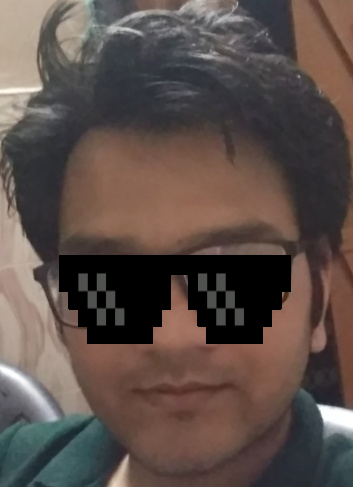

In [ ]:
cv2_imshow(img_copy)

In [ ]:
cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)
cv2.circle(img,(keypoints['left_eye']), 2, (0,0,255), 3)
cv2.circle(img,(keypoints['right_eye']), 2, (0,255,255), 3)
cv2.circle(img,(keypoints['nose']), 2, (0,155,255), 2)
cv2.circle(img,(keypoints['mouth_left']), 2, (0,155,255), 2)
cv2.circle(img,(keypoints['mouth_right']), 2, (0,155,255), 2)
cv2.circle(img,(130+680,286), 2, (255,155,255), 2)

array([[[224, 226, 237],
        [223, 225, 236],
        [223, 225, 236],
        ...,
        [222, 225, 246],
        [224, 227, 248],
        [225, 228, 249]],

       [[223, 225, 236],
        [223, 225, 236],
        [223, 225, 236],
        ...,
        [224, 227, 248],
        [225, 228, 249],
        [226, 229, 250]],

       [[223, 225, 236],
        [223, 225, 236],
        [223, 225, 236],
        ...,
        [224, 228, 247],
        [225, 229, 248],
        [226, 230, 249]],

       ...,

       [[218, 226, 249],
        [218, 226, 249],
        [219, 227, 250],
        ...,
        [ 26,  32,  51],
        [ 25,  32,  51],
        [ 25,  32,  51]],

       [[219, 227, 250],
        [219, 227, 250],
        [220, 228, 251],
        ...,
        [ 25,  31,  50],
        [ 25,  32,  51],
        [ 25,  32,  51]],

       [[219, 227, 250],
        [220, 228, 251],
        [220, 228, 251],
        ...,
        [ 25,  31,  50],
        [ 25,  32,  51],
        [ 25,  32,  51]]

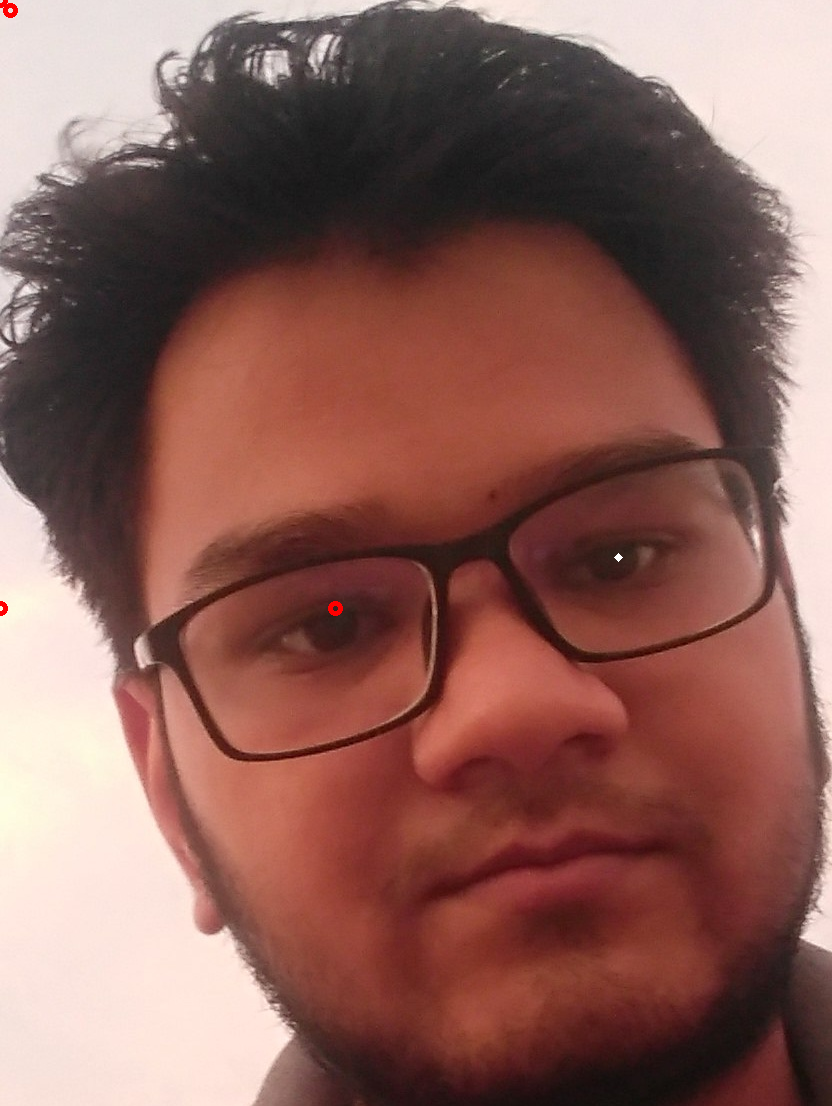

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
#img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
cv2.circle(img,(10,10), 5, (0,0,255), 3)
cv2.circle(img,(keypoints['right_eye']), 2, (255,255,255), 3)

array([[[224, 226, 237],
        [223, 225, 236],
        [223, 225, 236],
        ...,
        [222, 225, 246],
        [224, 227, 248],
        [225, 228, 249]],

       [[223, 225, 236],
        [223, 225, 236],
        [223, 225, 236],
        ...,
        [224, 227, 248],
        [225, 228, 249],
        [226, 229, 250]],

       [[223, 225, 236],
        [223, 225, 236],
        [  0,   0, 255],
        ...,
        [224, 228, 247],
        [225, 229, 248],
        [226, 230, 249]],

       ...,

       [[218, 226, 249],
        [218, 226, 249],
        [219, 227, 250],
        ...,
        [ 26,  32,  51],
        [ 25,  32,  51],
        [ 25,  32,  51]],

       [[219, 227, 250],
        [219, 227, 250],
        [220, 228, 251],
        ...,
        [ 25,  31,  50],
        [ 25,  32,  51],
        [ 25,  32,  51]],

       [[219, 227, 250],
        [220, 228, 251],
        [220, 228, 251],
        ...,
        [ 25,  31,  50],
        [ 25,  32,  51],
        [ 25,  32,  51]]